<a href="https://colab.research.google.com/github/mandafifah04/PCVK_Semeter6/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Untuk berinteraksi dengan sistem operasi
import os

# Untuk pemrosesan gambar dan pengolahan video
import cv2

# Untuk melakukan operasi numerik dan manipulasi array multidimensi
import numpy as np

# Untuk mengakses Google Drive
from google.colab import drive

# Untuk membuat visualisasi data, termasuk plot grafik.
import matplotlib.pyplot as plt

# TensorFlow adalah library open-source untuk kecerdasan buatan (Artificial Intelligence) dan machine learning.
# TensorFlow digunakan untuk membangun dan melatih model neural network untuk deteksi plat nomor.
import tensorflow as tf

# Untuk menghitung skor F1, yang merupakan metrik evaluasi untuk mengukur performa klasifikasi model.
from sklearn.metrics import f1_score

# Untuk mengakses fungsi-fungsi backend TensorFlow, seperti operasi tensor dan fungsi-fungsi matematika.
import tensorflow.keras.backend as K

# untuk mengimpor berbagai algoritma optimisasi yang digunakan dalam proses pelatihan model, seperti Adam, SGD, dll.
from tensorflow.keras import optimizers

# TensorFlow Keras digunakan untuk membangun dan melatih model neural network.
# Untuk membuat model dengan urutan layer yang linear.
from tensorflow.keras.models import Sequential

# Untuk melakukan augmentasi data pada gambar.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dense digunakan untuk menambahkan layer fully connected
# Flatten digunakan untuk meratakan output dari layer sebelumnya menjadi vektor.
# MaxPooling2D digunakan untuk melakukan pooling pada feature map.
# Dropout digunakan untuk menerapkan dropout regularization.
# Conv2D digunakan untuk menambahkan layer konvolusi pada gambar.
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Untuk mendeteksi plat nomor pada gambar
# plate_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/UAS/haarcascades/indian_license_plate.xml')
plate_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/PCVK_UAS/UAS/Dataset/haarcascades/indian_license_plate.xml')

In [ ]:
def detect_plate(img, text=''): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :] # extracting the Region of Interest of license plate for blurring.
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (51,181,155), 3) # finally representing the detected contours by drawing rectangles around the edges.
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2),
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (51,181,155), 1, cv2.LINE_AA)

    return plate_img, plate # returning the processed image.

In [ ]:
def detect_plate(img, text=''):

    # Untuk menampilkan gambar plat nomor yang telah diproses
    plate_img = img.copy()
    # Untuk mendapatkan Region of Interest (ROI) dari plat nomor.
    roi = img.copy()

    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.

    # Melakukan iterasi melalui setiap koordinat dan dimensi plat nomor yang terdeteksi.
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :]
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (255, 255, 0), 2) # finally representing the detected contours by drawing rectangles around the edges.
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2),
                                cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (255, 255, 0), 1, cv2.LINE_AA)

    # Mengembalikan gambar yang telah diproses
    return plate_img, plate

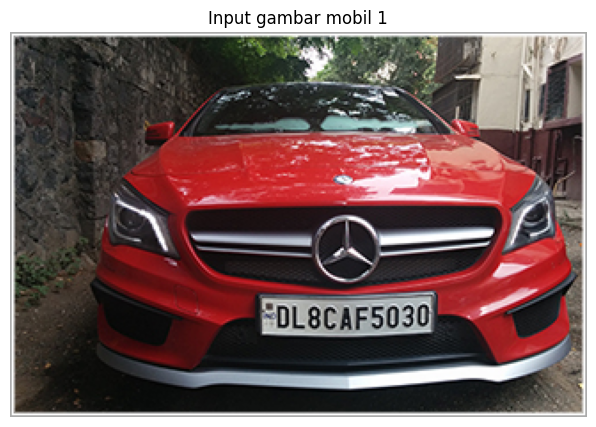

In [ ]:
# Fungsi untuk menampilkan gambar
def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membaca gambar menggunakan OpenCV
# img = cv2.imread('/content/drive/MyDrive/PCVK/UAS/Dataset/car.jpg')

# Membaca gambar menggunakan OpenCV
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/PCVK_UAS/UAS/Dataset/car.jpg')

# Menampilkan gambar input
display(img, 'Input gambar mobil 1')


In [ ]:
# Getting plate prom the processed image
output_img, plate = detect_plate(img)

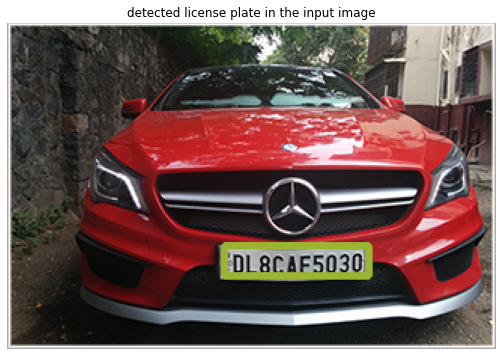

In [ ]:
display(output_img, 'detected license plate in the input image')



untuk mendapatkan plat nomor yang terdeteksi pada gambar yang telah diproses.

Pada kode tersebut, terdapat fungsi detect_plate yang dipanggil dengan argumen img, yang merupakan gambar yang telah diproses sebelumnya. Fungsi detect_plate akan melakukan deteksi plat nomor pada gambar tersebut dan mengembalikan gambar hasil deteksi (output_img) beserta plat nomor yang terdeteksi (plate).

Setelah mendapatkan gambar hasil deteksi dan plat nomor, kode tersebut menggunakan fungsi display untuk menampilkan gambar hasil deteksi (output_img) beserta teks "Plat nomor yang terdeteksi pada gambar input". Tujuan dari kode ini adalah untuk memvisualisasikan hasil deteksi plat nomor pada gambar input sehingga dapat dengan jelas melihat plat nomor yang terdeteksi.


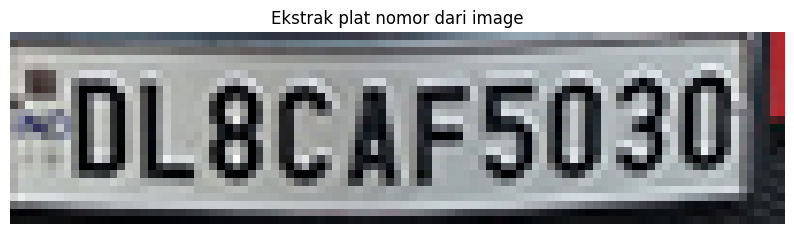

In [ ]:
display(plate, 'Ekstrak plat nomor dari image')

In [ ]:
# Match contours to license plate or character template
def find_contours(dimensions, img):
    # Temukan semua kontur dalam gambar
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Ambil dimensi potensial
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Periksa 5 atau 15 kontur terbesar untuk plat nomor atau karakter
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs:
        # Mendeteksi kontur pada gambar biner dan mengembalikan koordinat persegi panjang yang melingkupinya
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        # Memeriksa dimensi kontur untuk memfilter karakter berdasarkan ukuran kontur
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height:
            x_cntr_list.append(intX)  # menyimpan koordinat x dari kontur karakter, digunakan nanti untuk mengindeks kontur

            char_copy = np.zeros((50, 24))
            # mengekstraksi setiap karakter menggunakan koordinat persegi panjang yang melingkupinya
            char = img[intY:intY + intHeight, intX:intX + intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(ii, (intX, intY), (intWidth + intX, intY + intHeight), (50, 21, 200), 2)
            plt.imshow(ii, cmap='gray')

            # Membuat hasil yang diformat untuk klasifikasi: membalik warna
            char = cv2.subtract(255, char)

            # Ubah ukuran gambar menjadi 24x44 dengan batas hitam
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy)  # Daftar yang menyimpan gambar biner karakter (belum diurutkan)

    # Kembalikan karakter dengan urutan berdasarkan koordinat x (karakter paling kiri pertama)
    plt.show()

    # fungsi sembarang yang menyimpan daftar terurut dari indeks karakter
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])  # menyimpan gambar karakter sesuai dengan indeksnya
    img_res = np.array(img_res_copy)

    return img_res

In [ ]:
# Temukan karakter dalam gambar yang dihasilkan
def segment_characters(image):

    # Praproses gambar plat nomor yang dipotong
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Jadikan batas putih
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimasi ukuran kontur karakter plat nomor yang dipotong
    dimensions = [LP_WIDTH / 6,
                  LP_WIDTH / 2,
                  LP_HEIGHT / 10,
                  2 * LP_HEIGHT / 3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg', img_binary_lp)
    plt.axis('off')

    # Dapatkan kontur dalam plat nomor yang dipotong
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

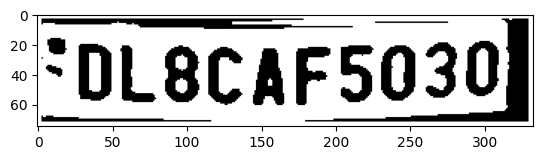

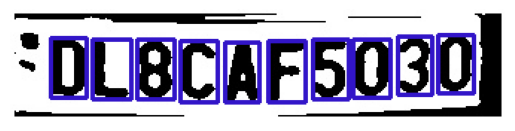

In [ ]:
# Let's see the segmented characters
# # Mari kita lihat karakter-karakter yang telah tersegmentasi
char = segment_characters(plate)

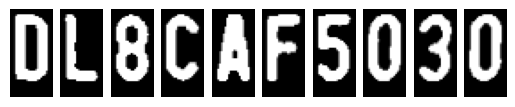

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

### Model for characters

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)

# path = '/content/drive/MyDrive/PCVK/UAS/Dataset/data'
path ='/content/drive/MyDrive/PCVK_MM/PCVK_UAS/UAS/Dataset/data'

train_generator = train_datagen.flow_from_directory(
    path+'/train',  # this is the target directory
    target_size=(28,28),  # all images will be resized to 28x28
    batch_size=1,
    class_mode='sparse'
)

validation_generator = train_datagen.flow_from_directory(
    path+'/val',  # this is the target directory
    target_size=(28,28),  # all images will be resized to 28x28
    batch_size=1,
    class_mode='sparse'
)


Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [ ]:
# Metrics for checking the model performance while training
def f1score(y, y_pred):
  return f1_score(y, tf.math.argmax(y_pred, axis=1), average='micro')

def custom_f1score(y, y_pred):
  return tf.py_function(f1score, (y, y_pred), tf.double)

In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=[custom_f1score])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        23248     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        131104    
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        131136    
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                        

In [ ]:
class stop_training_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_custom_f1score') > 0.99):
      self.model.stop_training = True

In [ ]:
batch_size = 1
callbacks = [stop_training_callback()]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator,
      epochs = 80, verbose=1, callbacks=callbacks)

Epoch 1/80
864/864 [==============================] - 37s 43ms/step - loss: 2.9783 - custom_f1score: 0.1863 - val_loss: 1.4203 - val_custom_f1score: 0.5640
Epoch 2/80
864/864 [==============================] - 37s 43ms/step - loss: 1.1699 - custom_f1score: 0.6574 - val_loss: 0.6418 - val_custom_f1score: 0.7887
Epoch 3/80
864/864 [==============================] - 37s 43ms/step - loss: 0.6014 - custom_f1score: 0.8113 - val_loss: 0.4681 - val_custom_f1score: 0.8378
Epoch 4/80
864/864 [==============================] - 37s 43ms/step - loss: 0.4520 - custom_f1score: 0.8600 - val_loss: 0.3428 - val_custom_f1score: 0.8810
Epoch 5/80
864/864 [==============================] - 37s 42ms/step - loss: 0.2921 - custom_f1score: 0.8993 - val_loss: 0.1688 - val_custom_f1score: 0.9449
Epoch 6/80
864/864 [==============================] - 36s 42ms/step - loss: 0.2482 - custom_f1score: 0.9213 - val_loss: 0.2451 - val_custom_f1score: 0.9390
Epoch 7/80
864/864 [==============================] - 37s 42ms/s

In [ ]:
# Predicting the output
def fix_dimension(img):
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img

def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): # iterasi pada setiap karakter
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) # mempersiapkan gambar untuk model
        y_ = model.predict_classes(img)[0] # melakukan prediksi kelas
        character = dic[y_] # mendapatkan karakter yang diprediksi
        output.append(character) # menyimpan hasil prediksi dalam sebuah list

    plate_number = ''.join(output)

    return plate_number

print(show_results())

DL8CAF5030


**Tahap ini merupakan tahap untuk melakukan prediksi output pada model Convolutional Neural Network (CNN)**
Pada tahap ini, terdapat dua fungsi yang didefinisikan. Fungsi pertama, fix_dimension, digunakan untuk mengubah dimensi gambar menjadi (28, 28, 3). Fungsi ini berguna karena model CNN yang digunakan mengharapkan input dengan dimensi tersebut.

Fungsi kedua, show_results, melakukan langkah-langkah berikut:

Membuat kamus (dictionary) dic yang berisi karakter-karakter yang mungkin terdapat pada plat nomor.
Melakukan iterasi pada setiap karakter dalam variabel char.
Mengubah dimensi karakter menjadi (28, 28) menggunakan cv2.resize dan kemudian memperbaiki dimensi menjadi (28, 28, 3) menggunakan fungsi fix_dimension.
Mengubah dimensi karakter menjadi bentuk yang sesuai untuk model dengan menggunakan reshape.
Memprediksi kelas karakter menggunakan model (model.predict_classes) dan mendapatkan karakter yang diprediksi dengan menggunakan kamus dic.
Menyimpan karakter hasil prediksi dalam sebuah list.
Menggabungkan karakter-karakter tersebut menjadi sebuah string plate_number.
Mengembalikan string plate_number sebagai hasil prediksi.
Terakhir, dengan menggunakan print(show_results()), hasil prediksi plat nomor akan ditampilkan.

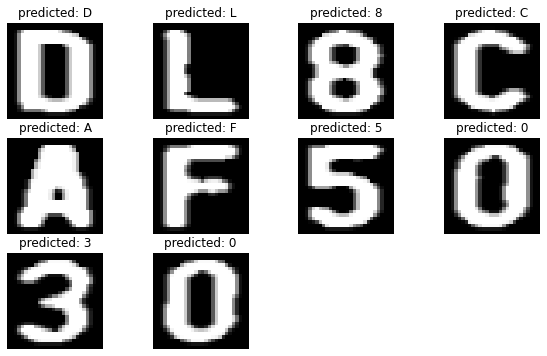

In [ ]:
# Segmented characters and their predicted value.
# visualisasi karakter-karakter yang telah dipisahkan (segmented characters) dan nilai prediksi (predicted value)
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

Tahap tersebut merupakan tahap visualisasi karakter-karakter yang telah dipisahkan (segmented characters) dan nilai prediksi (predicted value) dari setiap karakter pada proses pengenalan plat nomor menggunakan Convolutional Neural Network (CNN).

Pada tahap ini, terdapat perulangan `for` yang akan meloop melalui setiap karakter dalam variabel `char`. Untuk setiap karakter, gambar karakter tersebut akan diubah ukurannya menjadi 28x28 piksel menggunakan fungsi `cv2.resize`. Kemudian, menggunakan fungsi `plt.subplot`, gambar karakter akan ditampilkan dalam bentuk subplot dengan judul yang menunjukkan nilai prediksi dari karakter tersebut (diperoleh melalui fungsi `show_results()`). Fungsi `plt.imshow` digunakan untuk menampilkan gambar karakter dalam skala abu-abu (grayscale), dan `plt.axis('off')` digunakan untuk menyembunyikan sumbu pada plot.

Akhirnya, dengan menggunakan `plt.show()`, semua subplot yang berisi gambar karakter akan ditampilkan dalam sebuah figure dengan ukuran 10x6 inci. Tujuan dari tahap ini adalah untuk memvisualisasikan karakter-karakter yang telah dipisahkan dan menampilkan nilai prediksi dari setiap karakter pada proses pengenalan plat nomor.

In [ ]:
 img=cv2.imread('/content/drive/MyDrive/PCVK_MM/PCVK_UAS/UAS/Dataset/car.jpg')

In [ ]:
plate_number = show_results()
output_img, plate = detect_plate(img, plate_number)
print(plate_number)

DL8CAF5030


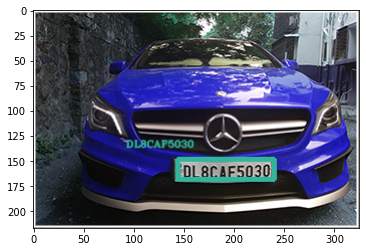

In [ ]:
plt.imshow(output_img,cmap='gray')

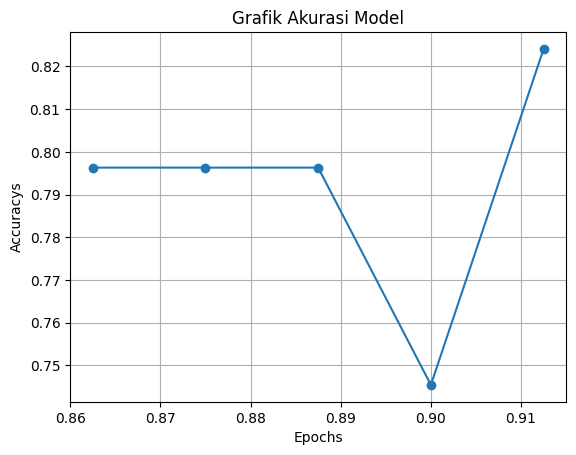

In [ ]:
import matplotlib.pyplot as plt

# Contoh data akurasi
epochs = [69/80, 70/80, 71/80, 72/80, 73/80]  # Jumlah epoch
accuracy = [0.7963, 0.7963, 0.7963, 0.7454, 0.8241]  # Data akurasi untuk setiap epoch

# Menggambar grafik
plt.plot(epochs, accuracy, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracys')
plt.title('Grafik Akurasi Model')
plt.grid(True)
plt.show()